In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [129]:
digits = load_digits()

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

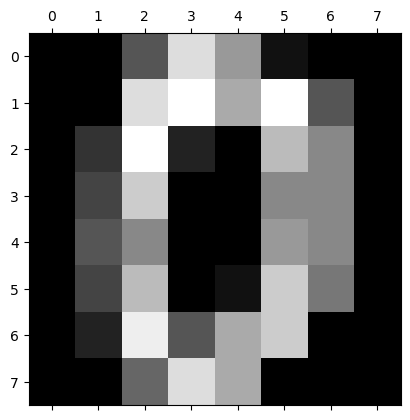

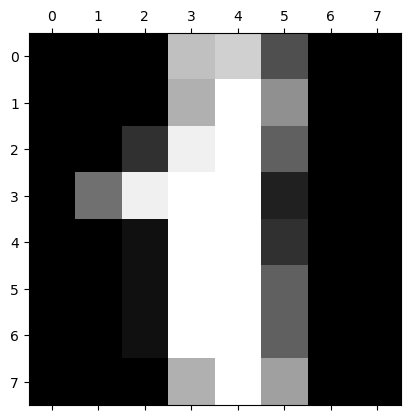

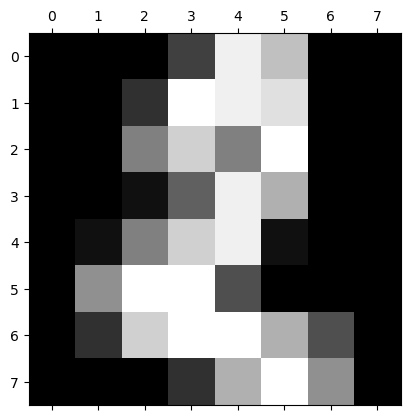

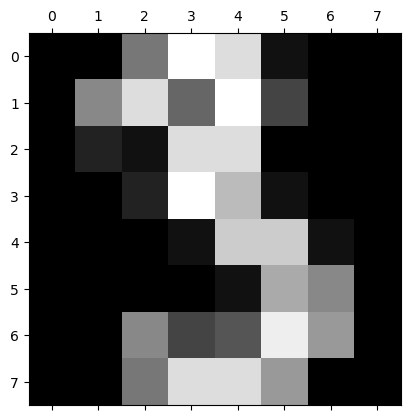

In [130]:
%matplotlib inline

plt.gray()

for i in range(4):
    plt.matshow(digits.images[i])

In [131]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)

df['target'] = digits.target

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [132]:
train_x, test_x, train_y, test_y = train_test_split(df.drop(columns=['target']), df['target'], test_size=.5)

In [133]:
from sklearn.ensemble import RandomForestClassifier

digits_model = RandomForestClassifier(n_estimators=10)

digits_model.fit(train_x, train_y)

RandomForestClassifier(n_estimators=10)

In [134]:
digits_model.score(test_x, test_y)

0.9299221357063404

In [135]:
predicted_y = digits_model.predict(test_x)

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
cm = confusion_matrix(test_y, predicted_y)
cm

array([[96,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 99,  1,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  0, 82,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  1,  0, 81,  1,  2,  0,  1,  3,  2],
       [ 1,  1,  0,  0, 81,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  2, 81,  1,  0,  2,  3],
       [ 0,  2,  0,  0,  1,  1, 87,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 83,  2,  0],
       [ 0,  6,  3,  2,  0,  0,  1,  2, 80,  0],
       [ 0,  2,  0,  1,  1,  3,  0,  0,  1, 66]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

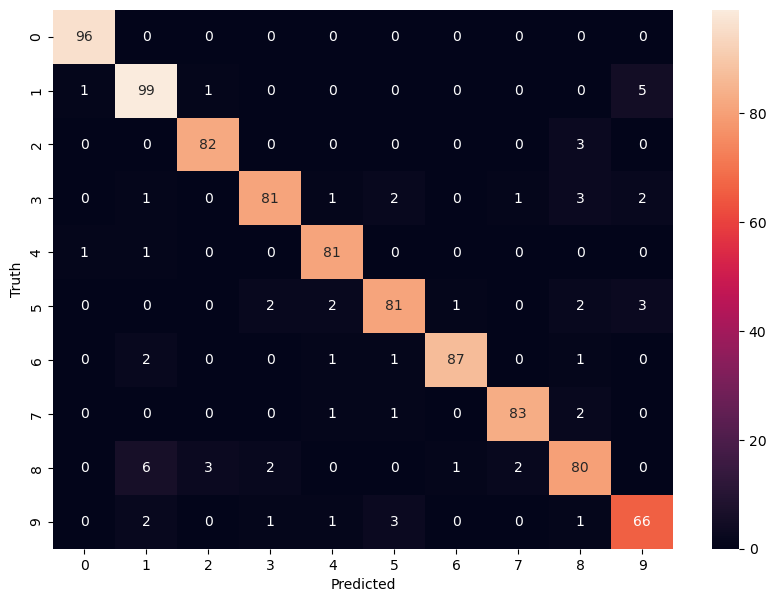

In [138]:
%matplotlib inline
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')